### 1. A nasty integral

Using Monte Carlo integration, check that

$$ \int_0^\infty x^3 \exp \left(-\frac{x^2}{2\sigma^2}\right) dx = 2\sigma^4 $$

- Does the result converge with the number of samples? And how does the error go down?
- Do it many times. For a given $N$, how are the result distributed? We'll talk about model fitting at lenght later on, but for now try to fit it by hand with a parametrized model. (If N is large enough you should get something that looks *very* accurate! And if $N$ is small?)
- How does the distribution change if $N$ increases?

(Hint: think about sample mean and sample variance)

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
def fun(x):
    """Function to integrate"""
    return x ** 3

def simulate_integral(N, mu, sigma):
    """Simulates the integral approximation using Monte Carlo method."""
    normal_factor = 0.5 * sigma * np.sqrt(2 * np.pi)  # Adjusting the normal factor
    samples = np.abs(np.random.normal(mu, sigma, N))  # Generate absolute values from a normal distribution
    integral = normal_factor * np.mean(fun(samples))  # Monte Carlo integration
    error = abs(expected_value - integral)/expected_value  # Compute absolute error
    
    return integral, error

# Parameters
N = 10000000  # Number of samples
mu = 0
sigma = 1

expected_value = 2 * sigma ** 4  # Theoretical integral result for comparison


integrals = []  # Store integral estimates
scarti = []  # Store errors

# Run simulation for different sample sizes
for N in range(N-int(N/100)*99, N+1, int(N/100)):
    if N==0:
        N=1
    integral, error = simulate_integral(N, mu, sigma)
    print(f"Samples: {N} | Estimated Integral: {integral:.5f} | Error: {error:.5f}")
    integrals.append(integral)
    scarti.append(error)

# Convert lists to numpy arrays
integrals = np.array(integrals)
scarti = np.array(scarti)


Samples: 100000 | Estimated Integral: 2.02197 | Error: 0.01098
Samples: 200000 | Estimated Integral: 2.00721 | Error: 0.00361
Samples: 300000 | Estimated Integral: 1.99514 | Error: 0.00243
Samples: 400000 | Estimated Integral: 1.98835 | Error: 0.00583
Samples: 500000 | Estimated Integral: 2.00127 | Error: 0.00063
Samples: 600000 | Estimated Integral: 1.98946 | Error: 0.00527
Samples: 700000 | Estimated Integral: 2.00230 | Error: 0.00115
Samples: 800000 | Estimated Integral: 2.00853 | Error: 0.00427
Samples: 900000 | Estimated Integral: 1.99770 | Error: 0.00115
Samples: 1000000 | Estimated Integral: 1.99364 | Error: 0.00318
Samples: 1100000 | Estimated Integral: 2.00260 | Error: 0.00130
Samples: 1200000 | Estimated Integral: 2.00652 | Error: 0.00326
Samples: 1300000 | Estimated Integral: 2.00972 | Error: 0.00486
Samples: 1400000 | Estimated Integral: 2.00072 | Error: 0.00036
Samples: 1500000 | Estimated Integral: 1.99652 | Error: 0.00174
Samples: 1600000 | Estimated Integral: 2.00194 | 

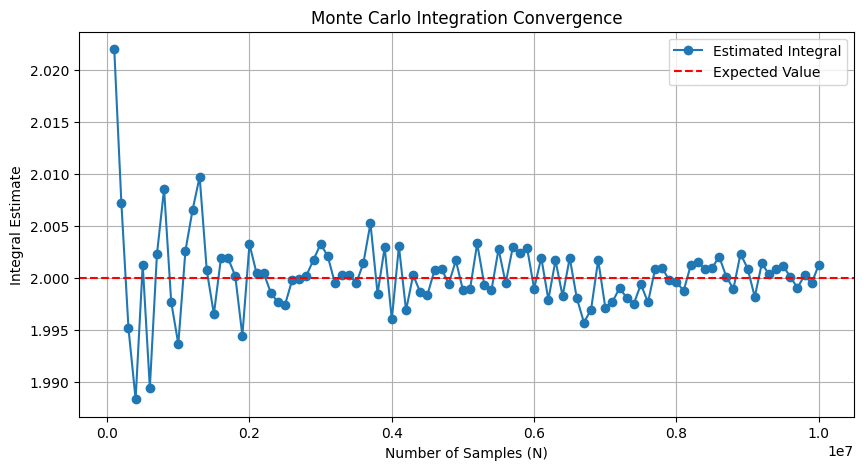

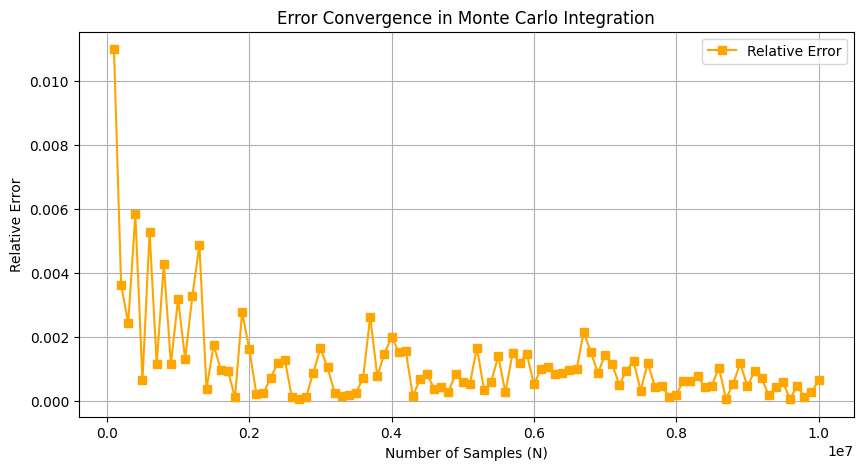

In [7]:
# Plot of estimated integrals
plt.figure(figsize=(10, 5))
plt.plot(range(N-int(N/100)*99, N+1, int(N/100)), integrals, marker='o', label="Estimated Integral")
plt.axhline(y=expected_value, color='r', linestyle='--', label="Expected Value")
plt.xlabel("Number of Samples (N)")
plt.ylabel("Integral Estimate")
plt.title("Monte Carlo Integration Convergence")
plt.legend()
plt.grid()
plt.show()

# Plot of relative error
plt.figure(figsize=(10, 5))
plt.plot(range(N-int(N/100)*99, N+1, int(N/100)), scarti, marker='s', color='orange', label="Relative Error")
plt.xlabel("Number of Samples (N)")
plt.ylabel("Relative Error")
plt.title("Error Convergence in Monte Carlo Integration")
plt.legend()
plt.grid()
plt.show()

Samples: 100000 | Estimated Integral: 2.02425
Samples: 100000 | Estimated Integral: 2.01208
Samples: 100000 | Estimated Integral: 1.98080
Samples: 100000 | Estimated Integral: 1.96952
Samples: 100000 | Estimated Integral: 1.98878
Samples: 100000 | Estimated Integral: 2.00487
Samples: 100000 | Estimated Integral: 1.99160
Samples: 100000 | Estimated Integral: 1.98427
Samples: 100000 | Estimated Integral: 1.97889
Samples: 100000 | Estimated Integral: 1.99625
Samples: 100000 | Estimated Integral: 2.01434
Samples: 100000 | Estimated Integral: 2.00382
Samples: 100000 | Estimated Integral: 1.99333
Samples: 100000 | Estimated Integral: 1.99688
Samples: 100000 | Estimated Integral: 2.02466
Samples: 100000 | Estimated Integral: 1.99320
Samples: 100000 | Estimated Integral: 1.98652
Samples: 100000 | Estimated Integral: 2.00125
Samples: 100000 | Estimated Integral: 2.01026
Samples: 100000 | Estimated Integral: 2.01616
Samples: 100000 | Estimated Integral: 1.99642
Samples: 100000 | Estimated Integr

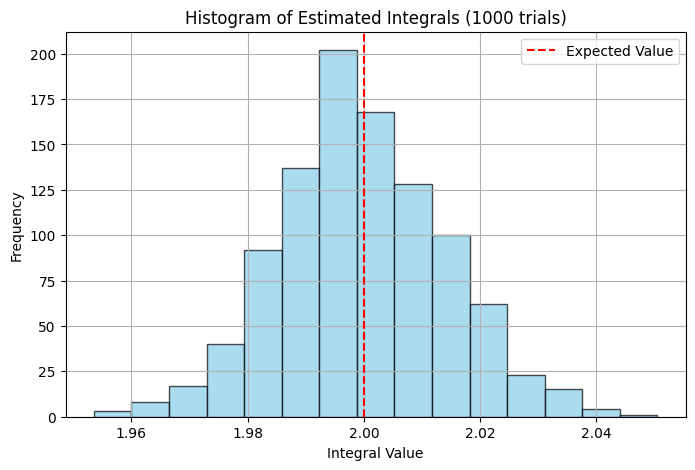

In [10]:
trial = 1000
integrale = []  # Store integral estimates

# Parameters
N = 100000  # Number of samples
mu = 0
sigma = 1

# Run simulation for different sample sizes
for _ in range(0, trial):
    integral, error = simulate_integral(N, mu, sigma)
    print(f"Samples: {N} | Estimated Integral: {integral:.5f}")
    integrale.append(integral)

# Convert lists to numpy arrays
integrale = np.array(integrale)

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(integrale, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(2 * sigma ** 4, color='red', linestyle='--', label='Expected Value')
plt.xlabel("Integral Value")
plt.ylabel("Frequency")
plt.title("Histogram of Estimated Integrals ({} trials)".format(trial))
plt.legend()
plt.grid(True)
plt.show()


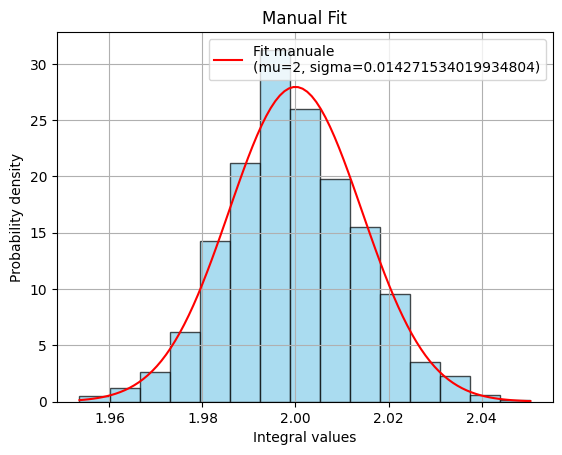

In [11]:
# Plot dell'istogramma dei dati simulati
plt.hist(integrale, bins=15, density='true' , color='skyblue', edgecolor='black', alpha=0.7)

# --------- FITTING "A MANO" -----------
# Definiamo una funzione gaussiana parametrizzata
def gauss(x, A, mu, sigma):
    return A * np.exp(- (x - mu) ** 2 / (2 * sigma ** 2))

# Proviamo "a mano" dei parametri
mu = expected_value
sigma_mu = np.std(integrale, ddof=1)
A = 1 / np.sqrt(2 * np.pi * sigma_mu ** 2)      # Altezza


# Creiamo l'asse x per la curva
x = np.linspace(min(integrale), max(integrale), 100)
y = gauss(x, A, mu, sigma_mu)

# Sovrapponiamo il fit "a mano"
plt.plot(x, y, color='red', label=f'Fit manuale\n(mu={mu}, sigma={sigma_mu})')

plt.xlabel('Integral values')
plt.ylabel('Probability density')
plt.legend()
plt.title('Manual Fit')
plt.grid(True)
plt.show()